<br><br>
<font size = "6">
<b>Unsupervised Learning: K-means Clustering</b>
</font>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Supervised-vs.-Unsupervised-Learning" data-toc-modified-id="1.-Supervised-vs.-Unsupervised-Learning-1">1. Supervised vs. Unsupervised Learning</a></span></li><li><span><a href="#2.-K-means" data-toc-modified-id="2.-K-means-2">2. K-means</a></span><ul class="toc-item"><li><span><a href="#2.1.-(Iterative)-Algorithm" data-toc-modified-id="2.1.-(Iterative)-Algorithm-2.1">2.1. (Iterative) Algorithm</a></span></li><li><span><a href="#2.2.-Summary:-K-means-Algorithm" data-toc-modified-id="2.2.-Summary:-K-means-Algorithm-2.2">2.2. Summary: K-means Algorithm</a></span></li><li><span><a href="#2.3.-K-means-Optimization-Point-of-View-(optional)" data-toc-modified-id="2.3.-K-means-Optimization-Point-of-View-(optional)-2.3">2.3. K-means Optimization Point of View (optional)</a></span></li></ul></li><li><span><a href="#3.-Python-code" data-toc-modified-id="3.-Python-code-3">3. Python code</a></span></li><li><span><a href="#4.-Some-Issues-in-K-means" data-toc-modified-id="4.-Some-Issues-in-K-means-4">4. Some Issues in K-means</a></span><ul class="toc-item"><li><span><a href="#4.1.-K-means:-Initialization-issues" data-toc-modified-id="4.1.-K-means:-Initialization-issues-4.1">4.1. K-means: Initialization issues</a></span></li><li><span><a href="#4.2.-Choosing-the-Number-of-Clusters" data-toc-modified-id="4.2.-Choosing-the-Number-of-Clusters-4.2">4.2. Choosing the Number of Clusters</a></span></li><li><span><a href="#4.3.-K-means:-Limitations" data-toc-modified-id="4.3.-K-means:-Limitations-4.3">4.3. K-means: Limitations</a></span></li></ul></li></ul></div>

# 1. Supervised vs. Unsupervised Learning
- Supervised: building a model from labeled data
- Unsupervised: clustering from unlabeled data

<font size='4'><b>Supervised Learning</b></font>

<br>
<center><img src="./image_files/clf.bmp" width = 400></center>

$$ 
\begin{array}{Icr}
\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}\\
\{y^{(1)},y^{(2)},\cdots,y^{(m)}\}
\end{array} 
\quad \Rightarrow \quad \text{Classification}
$$
<br>

<font size='4'><b>Unsupervised Learning</b></font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $m$ unlabeled examples $\{x^{(1)},x^{(2)}\cdots, x^{(m)}\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions

<br>
<center><img src="./image_files/cls.bmp" width = 400></center>

$$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \quad \Rightarrow \quad \text{Clustering}$$

<br>

- The only information clustering uses is the similarity between examples

- Clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


- It is a "chicken and egg" problem (dilemma)
    - Q: if we knew $c_i$s, how would we determine which points to associate with each cluster center?
    - A: for each point $x^{(i)}$, choose closest $c_i$
    <br><br>    
    - Q: if we knew the cluster memberships, how do we get the centers?
    - A: choose $c_i$ to be the mean of all points in the cluster

# 2. K-means

## 2.1. (Iterative) Algorithm
<br>
<font size='4'><b>1) Initialization</b></font>

Input:
- $k$: the number of clusters
- Training set $\{x^{(1)},x^{(2)},\cdots,x^{(m)}\}$

Randomly initialized anywhere in $\mathbb{R}^n$

<br><br>
<center><img src="./image_files/rand_init.png" width = 600></center>
<br>

<font size='4'><b>2) Iteration</b></font>

<br><br>
<center><img src="./image_files/cls_update.png" width = 600></center>

<br><br>
$$
\begin{align*}
c_k &= \{n: k = \arg \min_k \, \lVert x_n - \mu_k \rVert^2\}\\
\mu_k &= \frac{1}{\lvert c_k \rvert} \sum_{n \in c_k}x_n
\end{align*}
$$

Repeat until convergence 
- A possible convergence criteria: cluster centers do not change anymore

<font size='4'><b>3) Output</b></font>

Output: model
- $c$ (label): index (1 to $k$) of cluster centroid $\{c_1,c_2,\cdots,c_k\}$
- $\mu$ : averages (mean) of points assigned to cluster $\{\mu_1,\mu_2,\cdots,\mu_k\}$

<br>
<center><img src="./image_files/cls_result.png" width = 350></center>
<br>

## 2.2. Summary: K-means Algorithm


$
\,\text{Randomly initialize } k \,\text{cluster centroids } \mu_1,\mu_2,\cdots,\mu_k \in \mathbb{R}^n$

$
\begin{align*}
\text{Repeat}\;&\{ \\
&\text{for $i=1$ to $m$} \\    
&\quad \text{$c_i$ := index (from 1 to $k$) of cluster centroid closest to $x^{(i)}$} \\     
&\text{for $k=1$ to $k$} \\
&\quad \text{$\mu_k$ := average (mean) of points assigned to cluster $k$} \\
&\}
\end{align*}
$

## 2.3. K-means Optimization Point of View (optional)

- $c_i$= index of cluster $(1,2,\cdots,k)$ to which example $x^{(i)}$ is currently assigned
- $\mu_k$= cluster centroid $k$ ($\mu_k \in \mathbb{R}^n$)
- $\mu_{c_i}$= cluster centroid of cluster to which example $x^{(i)}$ has been assigned



- Optimization objective:

$$ J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k) = \frac{1}{m}\sum\limits_{i=1}^m \lVert x^{(i)}-\mu_{c_i}\rVert^2$$

$$ \min\limits_{c_1,\cdots,c_m, \; \mu_1,\cdots,\mu_k} J(c_1,\cdots,c_m,\mu_1,\cdots,\mu_k)$$

# 3. Python code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(300, 2)


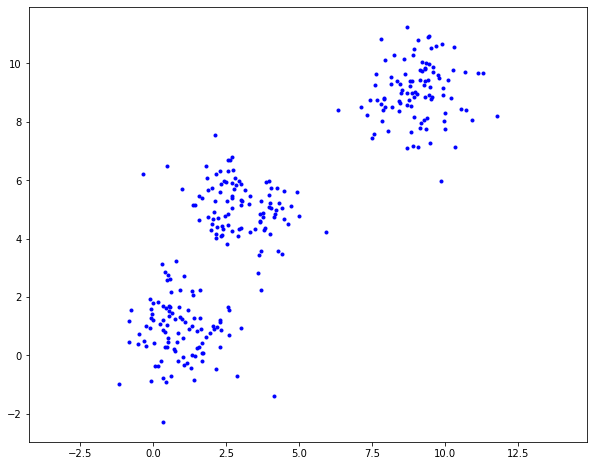

In [2]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100) # 평균, 공분산 ,size
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.axis('equal')
plt.show()

[[2.04515438 1.01847137]
 [1.552402   0.3003184 ]
 [1.48315702 0.25980753]]


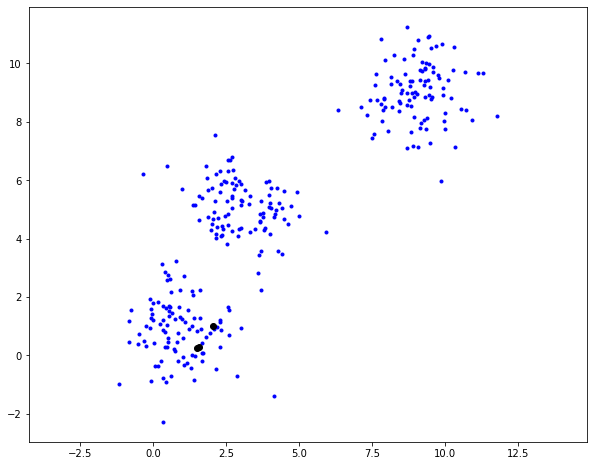

In [3]:
# The number of clusters and data
k = 3
m = X.shape[0]

# ramdomly initialize mean points
mu = X[np.random.randint(0, m, k), :] # 0부터 300사이의 숫자 3개 random하게 찾는다.
pre_mu = mu.copy() # 나중에 요긴하게 쓰임.
print(mu)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.plot(mu[:,0], mu[:,1], 'ko')
plt.axis('equal')
plt.show()

In [4]:
print(mu)

[[2.04515438 1.01847137]
 [1.552402   0.3003184 ]
 [1.48315702 0.25980753]]


In [5]:
y = np.empty([m,1])

#"Run K-means (until error < 1e-10)
'''
1. for문부터 시작
2. 모든 데이터 X와 임의로 지정한 cluster center까지의 거리 모두 계산
3. 가장 가까운 cluster center를 기반으로 데이터 X를 해당 cluster로 지정
4. error = 0부터 시작
5. 각 cluster로 지정된 X들의 mean값을 찾아서 mu로 새로 지정
6. error 계산
7. 1~6까지 반복하며 error가 1e-10이하인 경우 for문 break
'''

for i in range(10000): # while문으로 해도됨
    for j in range(m):
        d0 = np.linalg.norm(X[j,:] - mu[0,:], 2)
        d1 = np.linalg.norm(X[j,:] - mu[1,:], 2)
        d2 = np.linalg.norm(X[j,:] - mu[2,:], 2)
        
        y[j] = np.argmin([d0, d1, d2]) # d0, d1, d2중에서 가장 min을 가져온다.
    
    error = 0
    print(y)
    for z in range(k):
        mu[z,:] = np.mean(X[np.where(y == z)[0]], axis=0)
        error += np.linalg.norm(pre_mu[z,:] - mu[z,:], 2)

    pre_mu = mu.copy()
    
    if error < 1e-10: # if error < np.e**-10
        print('Iteration :', i)
        break

[[2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [0.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [2.]
 [0.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [2.]
 [0.]
 [0.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

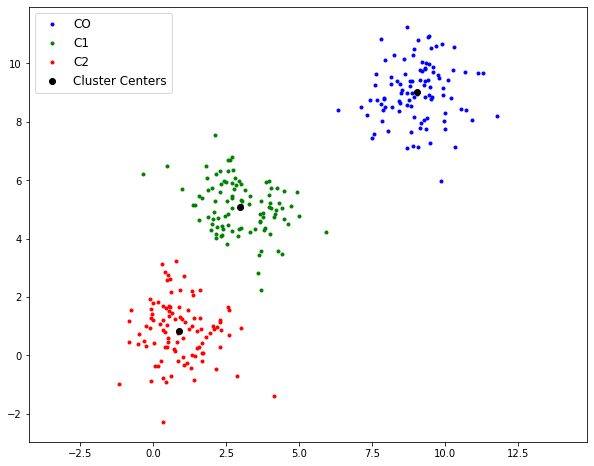

In [6]:
X0 = X[np.where(y == 0)[0]]
X1 = X[np.where(y == 1)[0]]
X2 = X[np.where(y == 2)[0]]

plt.figure(figsize = (10, 8))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'CO')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.plot(mu[:,0], mu[:,1], 'ko', label = 'Cluster Centers')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

In [10]:
kmeans.cluster_centers_

array([[2.97971474, 5.08845128],
       [9.02991422, 9.01469649],
       [0.8976399 , 0.84354448]])

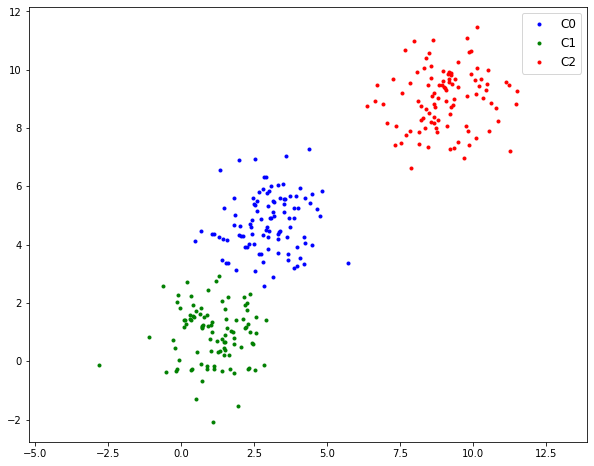

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

#kmeans.predict(X)

plt.figure(figsize = (10, 8))
plt.plot(X[kmeans.labels_==0,0], X[kmeans.labels_==0,1], 'b.', label='C0')
plt.plot(X[kmeans.labels_==1,0], X[kmeans.labels_==1,1], 'g.', label='C1')
plt.plot(X[kmeans.labels_==2,0], X[kmeans.labels_==2,1], 'r.', label='C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

# 4. Some Issues in K-means 

## 4.1. K-means: Initialization issues


- k-means is extremely senstitive to cluster center initialization


- Bad initialization can lead to
    - Poor convergence speed
    - Bad overall clustering


- Safeguarding measures:
    - Choose first center as one of the examples, second which is the farthest from the first, third which is the farthest from both, and so on.
    - Try multiple initialization and choose the best result
    

## 4.2. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $k$ for the K-means algorithm is to try different values of $k$, plot the K-means objective versus $k$, and look at the '<font color='green'>elbow-point</font>' in the plot

In [7]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

In [10]:
X

matrix([[ 5.35354262e-01, -9.66899286e-02],
        [ 2.08686380e+00,  7.75707914e-01],
        [ 8.51929542e-01,  7.97138315e-01],
        [ 1.13649472e+00,  1.32206357e+00],
        [ 1.62071954e+00,  1.58078870e+00],
        [ 2.58849608e-01,  1.68169154e+00],
        [ 1.46801206e+00,  2.31431872e-01],
        [ 1.12337057e+00,  1.71492760e+00],
        [ 1.17970091e+00,  2.13475123e+00],
        [ 1.28425211e+00, -2.13518988e-01],
        [ 5.35242219e-01,  1.12644645e+00],
        [ 5.85502044e-01,  8.49728309e-01],
        [-3.60653330e-01,  2.08295904e+00],
        [ 1.12165855e+00,  1.16993475e+00],
        [-5.57978506e-01,  1.90037752e+00],
        [ 6.51406236e-01,  5.55188487e-01],
        [ 1.06458929e+00,  5.87121149e-01],
        [ 7.15259854e-01,  2.06238823e+00],
        [ 2.10182119e+00,  1.35873605e+00],
        [ 2.23611794e+00,  9.92558232e-01],
        [ 2.15072085e+00,  1.78174084e+00],
        [ 6.33407142e-01, -5.40035524e-01],
        [ 8.05353801e-01, -1.206

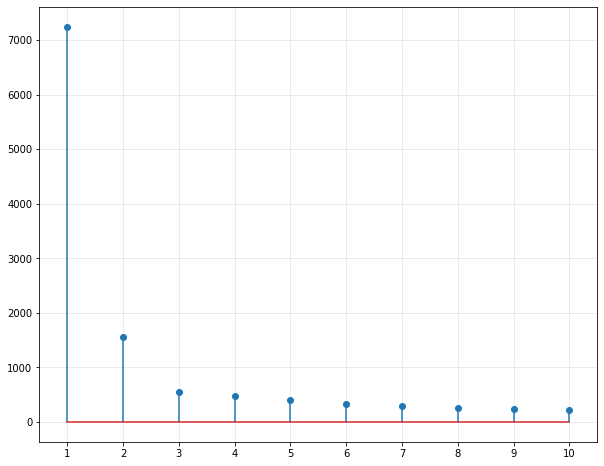

In [8]:
#"cost calculation, cost = abs(kmeans.score(X))"

cost = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0).fit(X)
    cost.append(abs(kmeans.score(X)))
    
plt.figure(figsize=(10,8))
plt.stem(range(1,11), cost)
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha=0.3)
plt.show()

## 4.3. K-means: Limitations

- Make <font color='red'>hard assignments</font> of points to clusters
    - A point either completely belongs to a cluster or not belongs at all
    - No notion of a <font color='green'>soft assignment</font> (_i.e._, probability of being assigned to each cluster)
    - Gaussian mixture model (we will study later) and Fuzzy K-means allow soft assignments


- Sensitive to outlier examples (such example can affect the mean by a lot)
    - <font color='green'>K-medians</font> algorithm is a more robust alternative for data with outliers


- Works well only for round shaped, and of roughly equal sizes/density cluster


- Does badly if the cluster have non-convex shapes
    - Spectral clustering (we will study later) and Kernelized K-means can be an alternative


- Non-convex/non-round-shaped cluster: standard K-means fails !

<br>
<center><img src="./image_files/cls_non-convex.png" width = 600></center>


- Clusters with different densities

<br>
<center><img src="./image_files/cls_diff_densities.png" width = 600></center>